1. 2000-2004: Traditional Retail Era

Main Competitors: Target, Kmart, Sears
Focus Areas:

Store expansion strategies and market share competition
Pricing strategies and discount campaigns
Customer loyalty programs and brand perception


The data used in this analysis was sourced from Investing.com



In [483]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [484]:
df=pd.read_csv("WMT Historical Data.csv")

In [485]:
df["WMT_price"]=df["Price"]
df["WMT_vol."]=df["Vol."]
df=df.iloc[:,[0,7,8]]

To enhance my analysis of Walmart's stock performance, I incorporated global economic indicators such as gold and silver prices, oil prices, and the NYSE index into my dataset. Initially, I considered WTI crude oil prices to be a more relevant indicator due to Walmart's U.S. focus. However, WTI data was unavailable for the period before mid-2001, so I opted to use Brent crude oil prices for the 2000-2004 period. From 2004 onwards, I will include WTI prices and exclude Brent.

Unfortunately, I couldn't find historical stock price data for key competitors like Target, Kmart, and Sears. This may be because they were not publicly traded or their data was unavailable from my chosen source.

In [486]:
df_nyse=pd.read_csv("NYSE Composite Geçmiş Verileri.csv",decimal=",")
df["nyse.price"]=df_nyse["Şimdi"]

df_silver=pd.read_csv("XAG_USD Geçmiş Verileri.csv",decimal=",")
df["silver.price"]=df_silver["Şimdi"]  

df_gold=pd.read_csv("XAU_USD Geçmiş Verileri.csv",decimal=",")
df["gold.price"]=df_gold["Şimdi"]

df_brent_petrol_indx=pd.read_csv("Brent Oil Futures Historical Data.csv",decimal=",")
df["brent.petrol.price"]=df_brent_petrol_indx["Price"]

df_us_indx=pd.read_csv("ABD Dolar Endeksi Geçmiş Verileri.csv",decimal=",")
df["dollar.index"]=df_us_indx["Şimdi"]

df['nyse.price']=df['nyse.price'].astype(str).str.split(',').str[0]

In [487]:
df.head(7)

,Date,WMT_price,WMT_vol.,nyse.price,silver.price,gold.price,brent.petrol.price,dollar.index
0,12/31/2004,17.61,25.18M,7.250,6.80,438.45,40.46,80.85
1,12/30/2004,17.69,19.62M,7.253,6.80,437.45,40.37,80.53
2,12/29/2004,17.81,17.25M,7.242,6.81,436.38,39.17,80.97
3,12/28/2004,17.74,19.85M,7.245,7.00,443.50,40.07,80.72
4,12/27/2004,17.60,29.00M,7.197,6.97,444.73,40.71,80.72
5,12/23/2004,17.52,25.06M,7.208,6.92,442.70,40.64,81.22
6,12/22/2004,17.66,37.29M,7.190,6.88,441.88,42.37,81.34


In [488]:
df["WMT_vol."]=df["WMT_vol."].astype(str).str.replace("M",'',regex=False)

In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1256 non-null   object 
 1   WMT_price           1256 non-null   float64
 2   WMT_vol.            1256 non-null   object 
 3   nyse.price          1256 non-null   object 
 4   silver.price        1256 non-null   float64
 5   gold.price          1256 non-null   float64
 6   brent.petrol.price  1256 non-null   object 
 7   dollar.index        1256 non-null   float64
dtypes: float64(4), object(4)
memory usage: 78.6+ KB


In [490]:
for column in df.iloc[ :,1:].select_dtypes(include=['object']).columns:
    df[column]=pd.to_numeric(df[column],errors='coerce')

In [491]:
df.describe()

,WMT_price,WMT_vol.,nyse.price,silver.price,gold.price,brent.petrol.price,dollar.index
count,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000
mean,18.022404,25.861043,6.169995,5.100191,328.382492,29.031059,103.719347
std,1.324039,9.693110,0.680456,0.903075,55.595928,6.041160,11.321643
min,14.420000,6.100000,4.452000,4.060000,255.550000,17.680000,80.530000
25%,17.280000,19.657500,5.713500,4.510000,276.225000,25.467500,92.427500
50%,17.980000,24.020000,6.342000,4.790000,316.625000,27.985000,106.485000
75%,18.900000,29.800000,6.699000,5.150000,380.287500,31.082500,114.120000
max,22.830000,83.990000,7.253000,8.230000,455.820000,51.560000,120.900000


In [492]:
df["WMT_vol."]=df["WMT_vol."].astype(str).str.replace("M",'',regex=False)

C:\Users\SİNAN-PC\AppData\Local\Temp\ipykernel_21672\1686934374.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.iloc[:,1:].corr()


<Axes: >

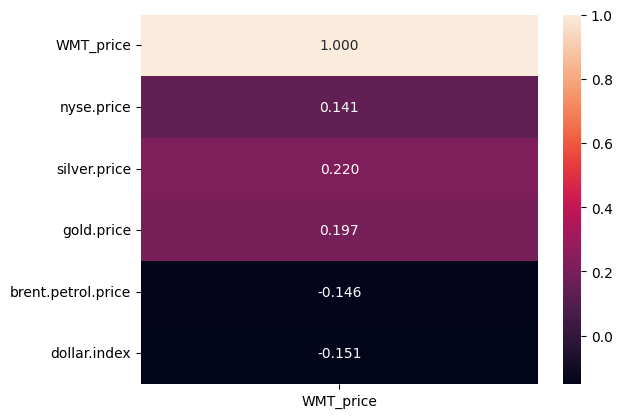

In [493]:
corr_matrix=df.iloc[:,1:].corr()
sns.heatmap(data=corr_matrix["WMT_price"].to_frame(),annot=True,fmt=".3f")

In [494]:
df['Date']=pd.to_datetime(df['Date']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                1256 non-null   datetime64[ns]
 1   WMT_price           1256 non-null   float64       
 2   WMT_vol.            1256 non-null   object        
 3   nyse.price          1256 non-null   float64       
 4   silver.price        1256 non-null   float64       
 5   gold.price          1256 non-null   float64       
 6   brent.petrol.price  1256 non-null   float64       
 7   dollar.index        1256 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 78.6+ KB


<Axes: xlabel='Date', ylabel='WMT_price'>

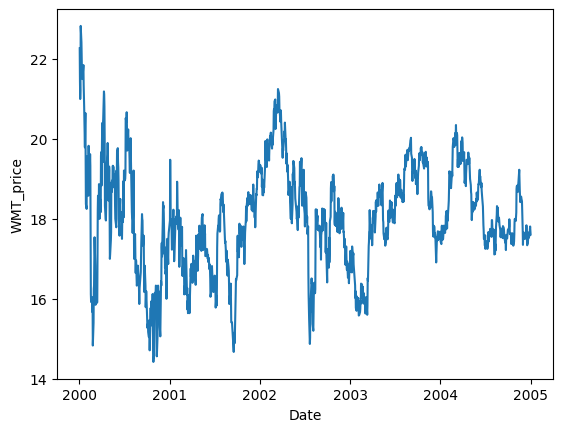

In [495]:

sns.lineplot(x="Date",y="WMT_price",data=df)

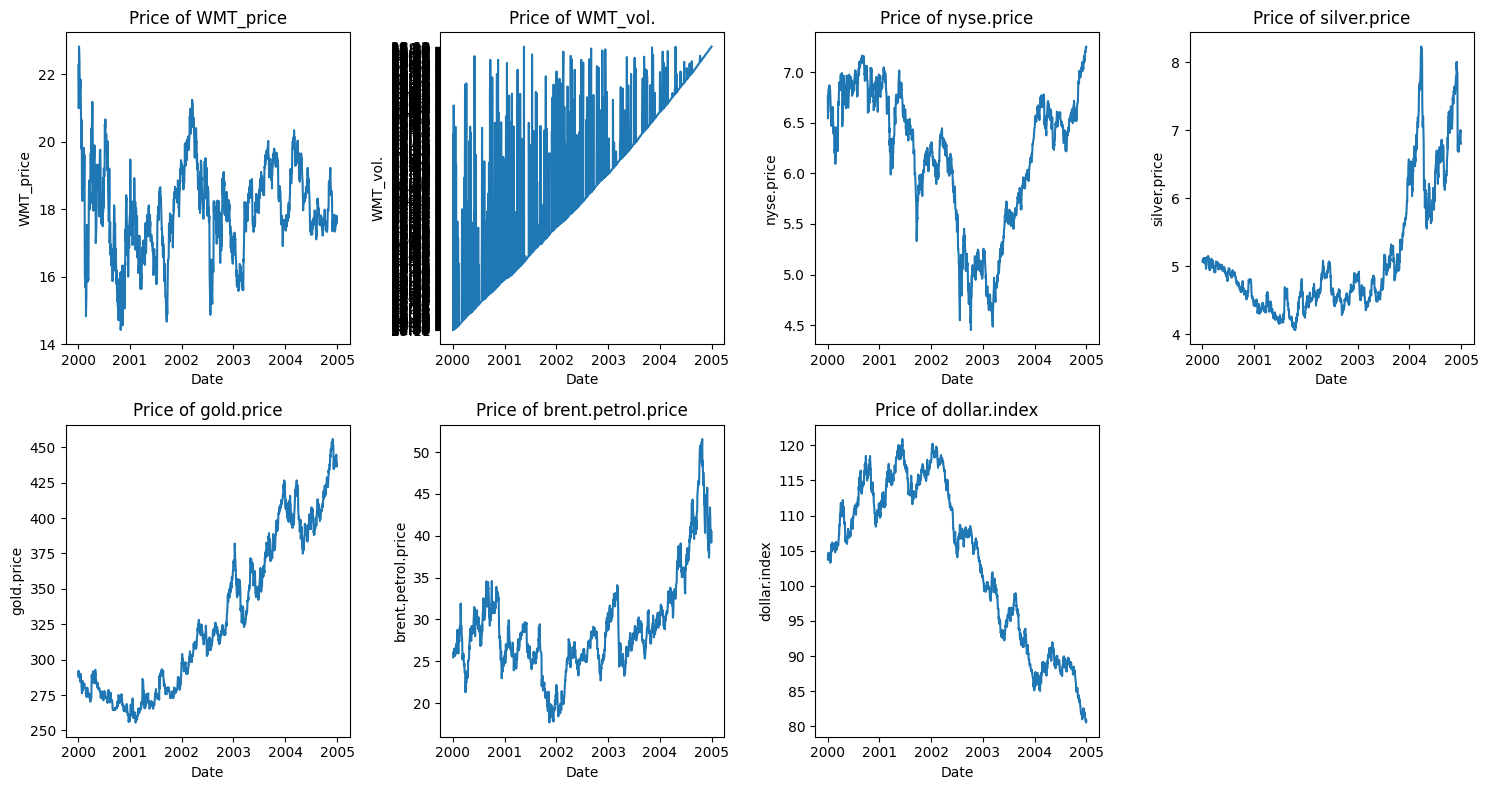

In [496]:

fig, axes = plt.subplots(nrows=2,ncols=4,figsize=(15, 8))  
for i, ax in zip(df.iloc[:, 1:].columns,axes.flatten()):
    sns.lineplot(data=df,x="Date",y=i,ax=ax)
    ax.set_title(f"Price of {i}")

if len(df.iloc[:, 1:].columns) < 8:
    fig.delaxes(axes.flatten()[len(df.iloc[:, 1:].columns)])

plt.tight_layout()

plt.show()

In [497]:
df["WMT_vol."]=pd.to_numeric(df["WMT_vol."],errors='coerce')

In [498]:
for i in df.iloc[:,1:]:
    volatility=df[i].std()
    print(f"Volatility of {i} : {volatility:.2f}")

Volatility of WMT_price : 1.32
Volatility of WMT_vol. : 9.69
Volatility of nyse.price : 0.68
Volatility of silver.price : 0.90
Volatility of gold.price : 55.60
Volatility of brent.petrol.price : 6.04
Volatility of dollar.index : 11.32


In [499]:
changes_df=pd.DataFrame()
for i in df.iloc[:,1:]:
    a=df[i].diff()
    changes_df[f"{i}.changes"]=a


In [500]:
changes_df=changes_df.dropna()
changes_df["Date"]=df.iloc[1:,[0]]
changes_df

,WMT_price.changes,WMT_vol..changes,nyse.price.changes,silver.price.changes,gold.price.changes,brent.petrol.price.changes,dollar.index.changes,Date
1,0.08,-5.56,0.003,0.00,-1.00,-0.09,-0.32,2004-12-30
2,0.12,-2.37,-0.011,0.01,-1.07,-1.20,0.44,2004-12-29
3,-0.07,2.60,0.003,0.19,7.12,0.90,-0.25,2004-12-28
4,-0.14,9.15,-0.048,-0.03,1.23,0.64,0.00,2004-12-27
5,-0.08,-3.94,0.011,-0.05,-2.03,-0.07,0.50,2004-12-23
...,...,...,...,...,...,...,...,...
1251,0.41,3.79,-0.046,-0.01,-1.38,-0.25,-0.45,2000-01-07
1252,-1.60,-4.29,-0.157,0.04,2.25,-0.26,0.54,2000-01-06
1253,-0.23,1.42,-0.068,-0.01,-2.65,0.21,0.42,2000-01-05
1254,0.44,-0.82,-0.024,-0.01,3.50,-0.40,-0.35,2000-01-04


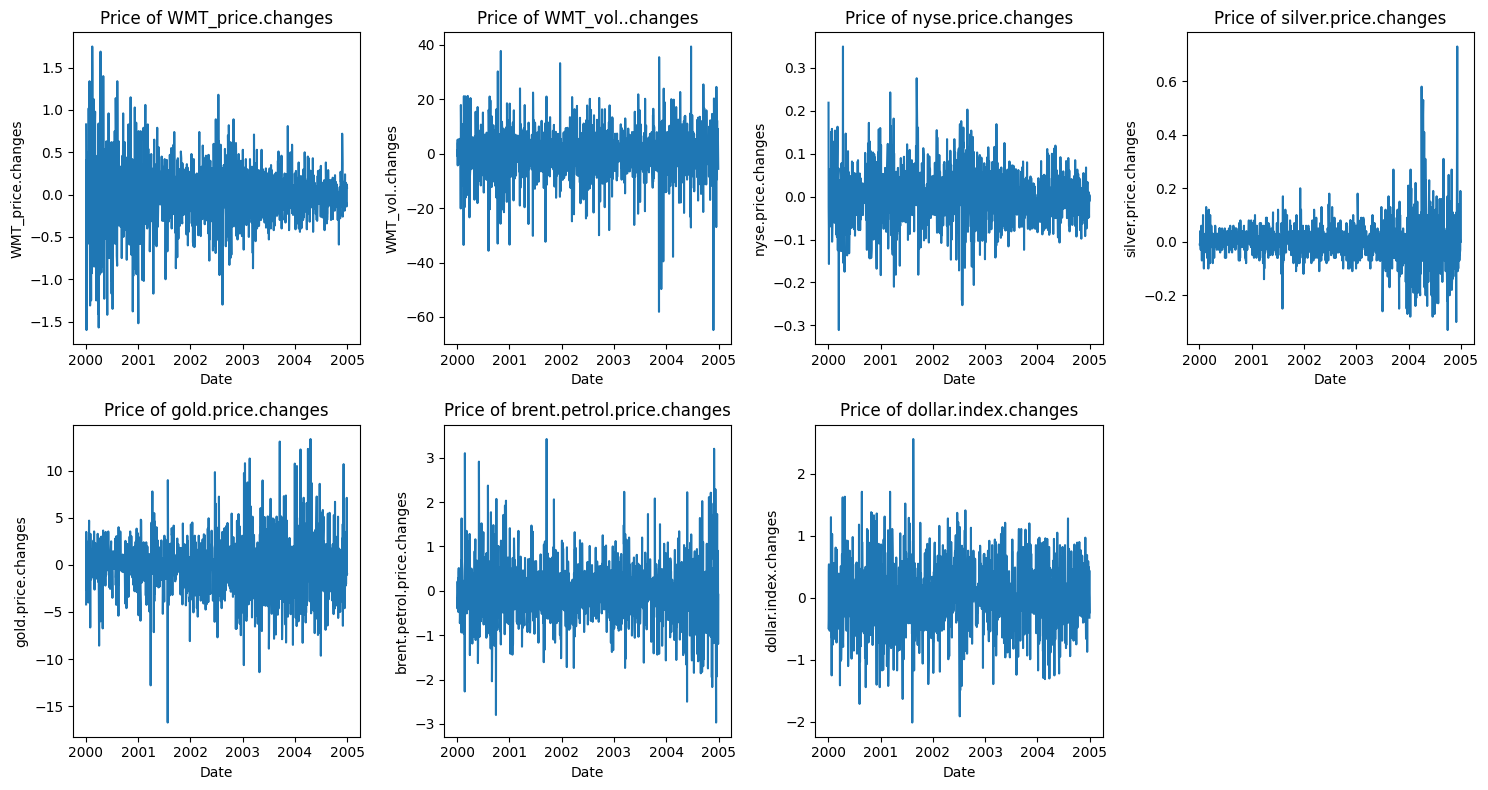

In [501]:
fig, axes=plt.subplots(nrows=2,ncols=4,figsize=(15, 8))  


for i, ax in zip(changes_df.iloc[:, :-1].columns, axes.flatten()):
    sns.lineplot(x="Date",y=i,data=changes_df, ax=ax)
    ax.set_title(f"Price of {i}")

if len(changes_df.iloc[:, 1:].columns)<8:
    fig.delaxes(axes.flatten()[len(df.iloc[:, 1:].columns)])
plt.tight_layout()

plt.show()

WMT stock showed high volatility in 2000, but it gradually decreased over time, likely due to market stabilization. Brent oil and gold, as commodities, experienced sudden fluctuations influenced by supply-demand dynamics and economic or political events. In 2004, sharp increases in gold and silver prices can be attributed to global economic factors. WMT's volume changes also display significant fluctuations, with volume spikes often signaling upcoming price changes.

In [502]:
df["year"]=df["Date"].dt.year
df["month"]=df["Date"].dt.month
df["day"]=df["Date"].dt.day

df["month_sin"]=np.sin(2*np.pi*df["month"] / 12)
df["month_cos"]=np.cos(2*np.pi*df["month"] / 12)

df["day_sin"]=np.sin(2*np.pi*df["day"] / 31)
df["day_cos"]=np.cos(2*np.pi*df["day"] / 31)

df["year_sin"]=np.sin(2*np.pi*df["year"])
df["year_cos"]=np.cos(2*np.pi*df["year"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                1256 non-null   datetime64[ns]
 1   WMT_price           1256 non-null   float64       
 2   WMT_vol.            1256 non-null   float64       
 3   nyse.price          1256 non-null   float64       
 4   silver.price        1256 non-null   float64       
 5   gold.price          1256 non-null   float64       
 6   brent.petrol.price  1256 non-null   float64       
 7   dollar.index        1256 non-null   float64       
 8   year                1256 non-null   int64         
 9   month               1256 non-null   int64         
 10  day                 1256 non-null   int64         
 11  month_sin           1256 non-null   float64       
 12  month_cos           1256 non-null   float64       
 13  day_sin             1256 non-null   float64     

In [503]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_sc=df.iloc[:,[2,3,4,5,6,7]]
scaler.fit(X_sc)
X_scaled=scaler.transform(X_sc)
new_features=df[["year_sin","year_cos","month_sin","month_cos","day_sin","day_cos"]].values
X_final=np.hstack((X_scaled, new_features))
y=df["WMT_price"]

In [504]:
changes_df.describe()

,WMT_price.changes,WMT_vol..changes,nyse.price.changes,silver.price.changes,gold.price.changes,brent.petrol.price.changes,dollar.index.changes
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000
mean,0.003713,-0.000056,-0.000389,-0.001378,-0.119960,-0.011944,0.018287
std,0.373991,9.155447,0.064695,0.078298,3.071548,0.702762,0.544957
min,-1.600000,-64.820000,-0.311000,-0.330000,-16.750000,-2.970000,-2.010000
25%,-0.200000,-4.275000,-0.037000,-0.040000,-1.750000,-0.425000,-0.300000
50%,0.010000,0.220000,-0.003000,0.000000,-0.050000,-0.040000,0.000000
75%,0.210000,4.845000,0.039000,0.030000,1.400000,0.370000,0.375000
max,1.750000,39.410000,0.350000,0.730000,13.370000,3.420000,2.560000


C:\Users\SİNAN-PC\AppData\Local\Temp\ipykernel_21672\236147860.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix=changes_df.corr()


<Axes: >

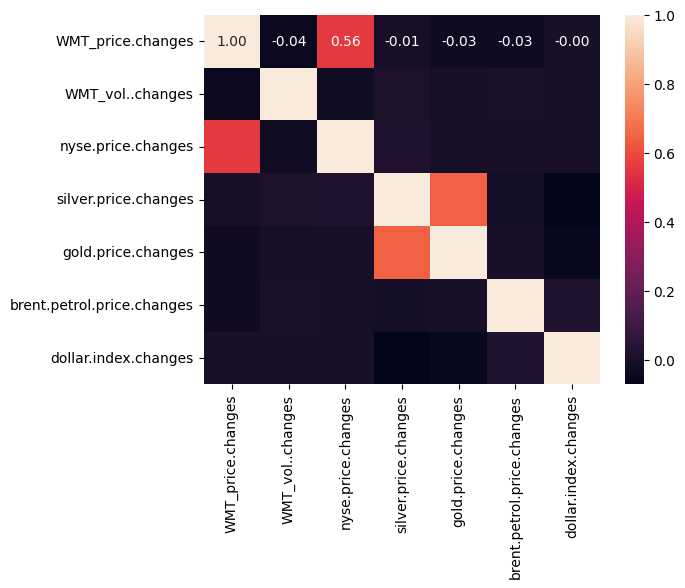

In [505]:
cor_matrix=changes_df.corr()
sns.heatmap(data=cor_matrix,annot=True,fmt=".2f")

In [506]:
changes_df.describe()

,WMT_price.changes,WMT_vol..changes,nyse.price.changes,silver.price.changes,gold.price.changes,brent.petrol.price.changes,dollar.index.changes
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000
mean,0.003713,-0.000056,-0.000389,-0.001378,-0.119960,-0.011944,0.018287
std,0.373991,9.155447,0.064695,0.078298,3.071548,0.702762,0.544957
min,-1.600000,-64.820000,-0.311000,-0.330000,-16.750000,-2.970000,-2.010000
25%,-0.200000,-4.275000,-0.037000,-0.040000,-1.750000,-0.425000,-0.300000
50%,0.010000,0.220000,-0.003000,0.000000,-0.050000,-0.040000,0.000000
75%,0.210000,4.845000,0.039000,0.030000,1.400000,0.370000,0.375000
max,1.750000,39.410000,0.350000,0.730000,13.370000,3.420000,2.560000


<Axes: >

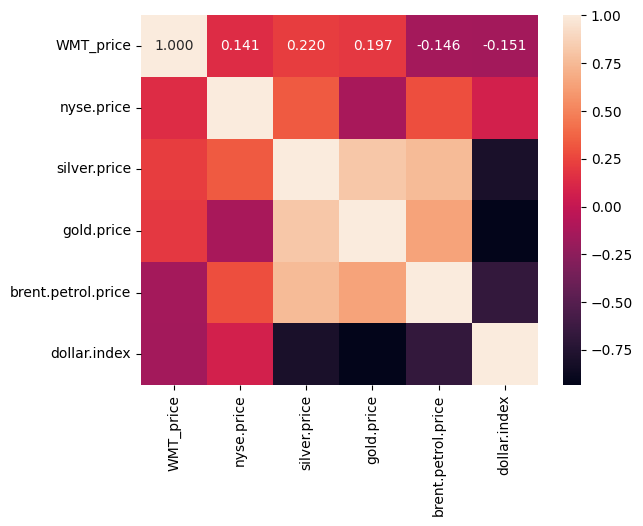

In [507]:
sns.heatmap(data=corr_matrix,annot=True,fmt=".3f")

In [508]:
df.iloc[:,1:].skew()

WMT_price             0.052993
WMT_vol.              1.642847
nyse.price           -0.671412
silver.price          1.478640
gold.price            0.481763
brent.petrol.price    1.211183
dollar.index         -0.331732
year                 -0.005634
month                -0.009579
day                   0.016532
month_sin             0.018804
month_cos             0.020176
day_sin              -0.011904
day_cos               0.035455
year_sin              0.000000
year_cos              0.000000
dtype: float64

WMT_price: Nearly symmetrical distribution, indicating a similar likelihood of extreme high or low prices.

WMT_vol: Positively skewed, suggesting most trading volumes are relatively low, with occasional high volumes.

nyse.price: Negatively skewed, implying the index price is usually high, but can experience significant drops.

silver.price: Highly positively skewed, indicating most prices are relatively low, with potential for large price increases.

gold.price: Moderately positively skewed, similar to silver but to a lesser extent.

brent.petrol.price: Highly positively skewed.

dollar.index: Negatively skewed.

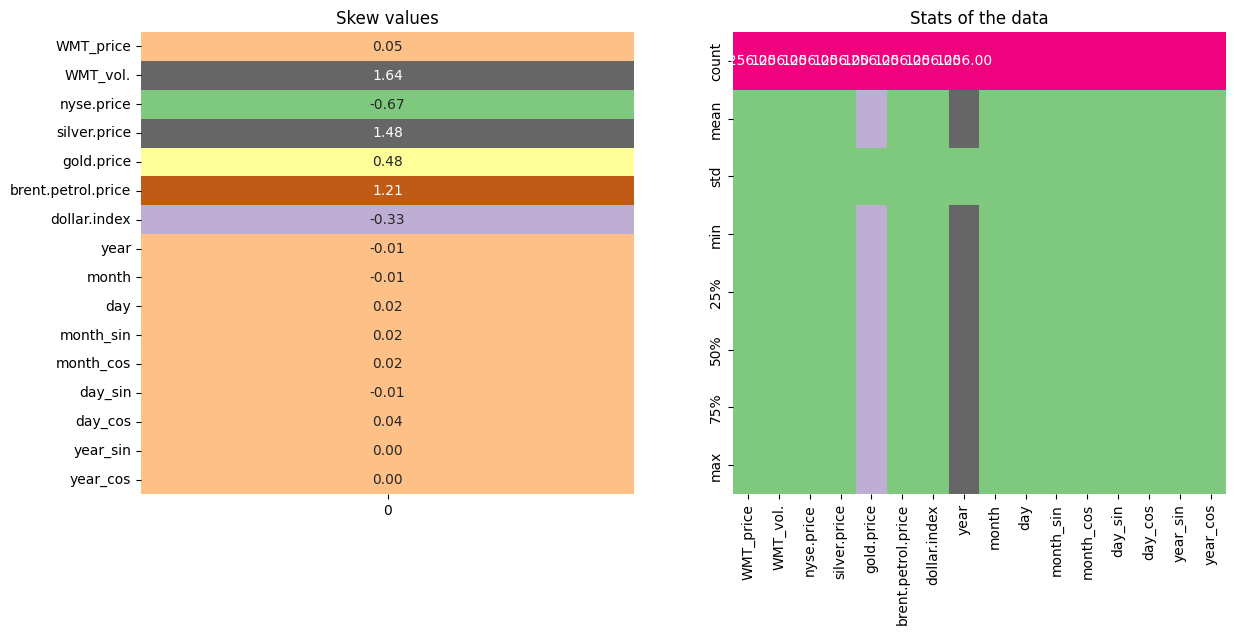

In [509]:
plt.figure(figsize=(14,6))
skewness=pd.DataFrame(df.iloc[:,1:].skew())
plt.subplot(1,2,1)
plt.title("Skew values")
sns.heatmap(data=skewness,annot=True,fmt=".2f",cmap="Accent",cbar=False)
plt.subplot(1,2,2,)
plt.title("Stats of the data")
sns.heatmap(data=df.iloc[:,1:].describe(),annot=True,fmt=".2f",cmap="Accent",cbar=False)
plt.show()

In [510]:
from scipy.stats import zscore
z_scores=zscore(df.iloc[:,1:])
z_scores.describe()

,WMT_price,WMT_vol.,nyse.price,silver.price,gold.price,brent.petrol.price,dollar.index,year,month,day,month_sin,month_cos,day_sin,day_cos,year_sin,year_cos
count,1.256000e+03,1.256000e+03,1.256000e+03,1.256000e+03,1.256000e+03,1.256000e+03,1.256000e+03,1.256000e+03,1.256000e+03,1.256000e+03,1.256000e+03,1.256000e+03,1.256000e+03,1.256000e+03,1.256000e+03,0.0
mean,7.693775e-16,4.525750e-17,4.073175e-16,1.357725e-16,-4.525750e-16,-5.883475e-16,-1.448240e-15,4.607213e-14,1.131437e-17,2.687164e-17,4.525750e-17,2.262875e-17,-2.121445e-17,7.071484e-18,-3.394312e-17,NaN
std,1.000398e+00,1.000398e+00,1.000398e+00,1.000398e+00,1.000398e+00,1.000398e+00,1.000398e+00,1.000398e+00,1.000398e+00,1.000398e+00,1.000398e+00,1.000398e+00,1.000398e+00,1.000398e+00,1.000398e+00,NaN
min,-2.721852e+00,-2.039481e+00,-2.525778e+00,-1.152291e+00,-1.310555e+00,-1.879702e+00,-2.049047e+00,-1.415343e+00,-1.611475e+00,-1.682700e+00,-1.406623e+00,-1.402006e+00,-1.406291e+00,-1.390666e+00,-1.249110e+00,NaN
25%,-5.609351e-01,-6.402500e-01,-6.711343e-01,-6.537953e-01,-9.385268e-01,-5.901148e-01,-9.977655e-01,-7.087964e-01,-7.375488e-01,-8.846903e-01,-1.216996e+00,-1.212677e+00,-1.022954e+00,-1.052962e+00,-9.065947e-01,NaN
50%,-3.203934e-02,-1.900088e-01,2.528795e-01,-3.436200e-01,-2.115654e-01,-1.732243e-01,2.443775e-01,-2.250147e-03,1.363770e-01,2.732038e-02,8.772532e-03,1.117063e-02,-8.656115e-03,-4.017195e-02,1.415818e-01,NaN
75%,6.630808e-01,4.065285e-01,7.777370e-01,5.517677e-02,9.339836e-01,3.397126e-01,9.190182e-01,7.042961e-01,1.010303e+00,8.253297e-01,7.164702e-01,7.177592e-01,1.005642e+00,1.017682e+00,4.840968e-01,NaN
max,3.632453e+00,5.999324e+00,1.592222e+00,3.467105e+00,2.293122e+00,3.730726e+00,1.518110e+00,1.410842e+00,1.592920e+00,1.737340e+00,1.424168e+00,1.424348e+00,1.388979e+00,1.462545e+00,1.532273e+00,NaN


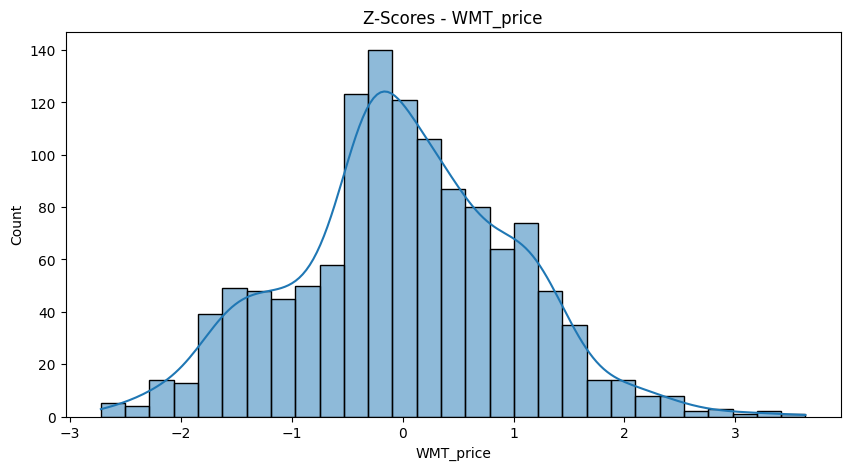

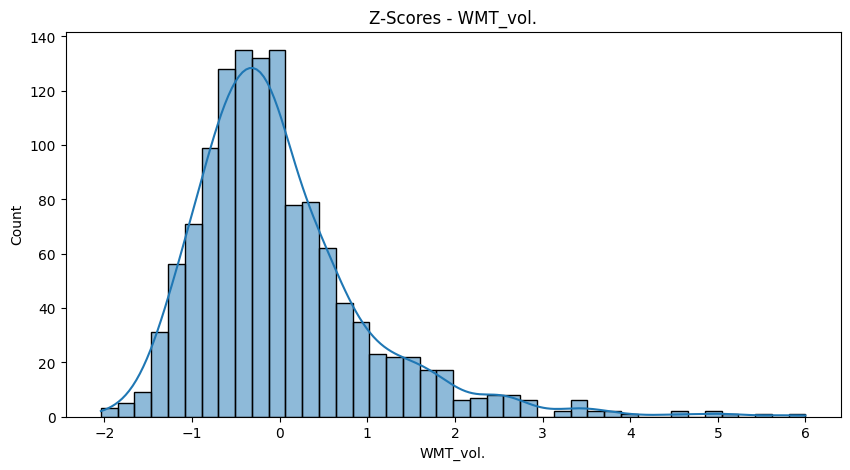

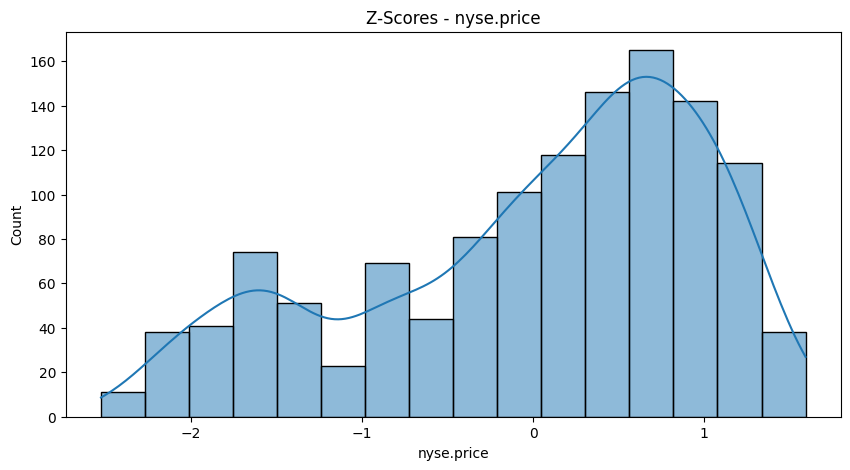

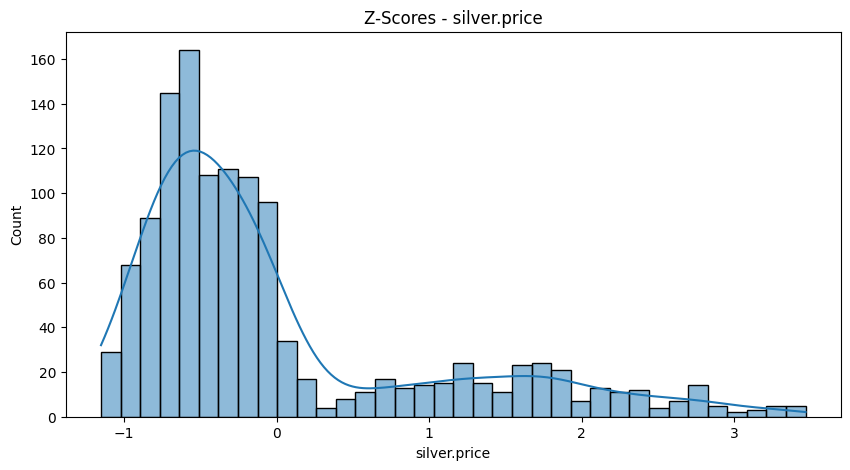

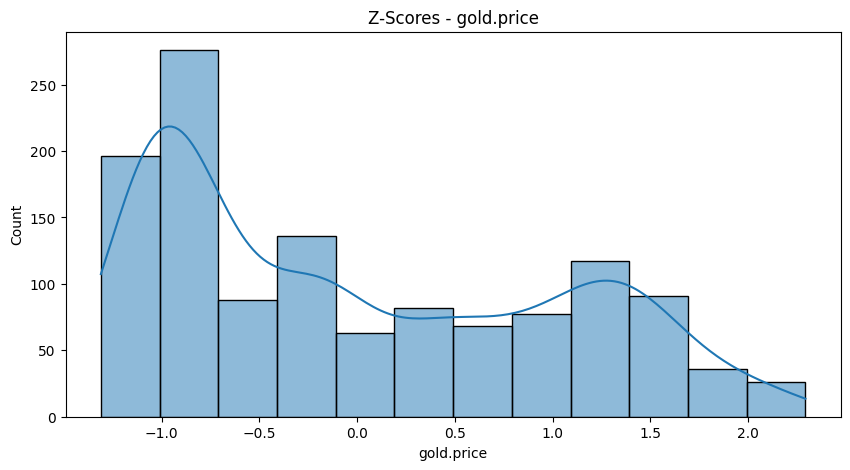

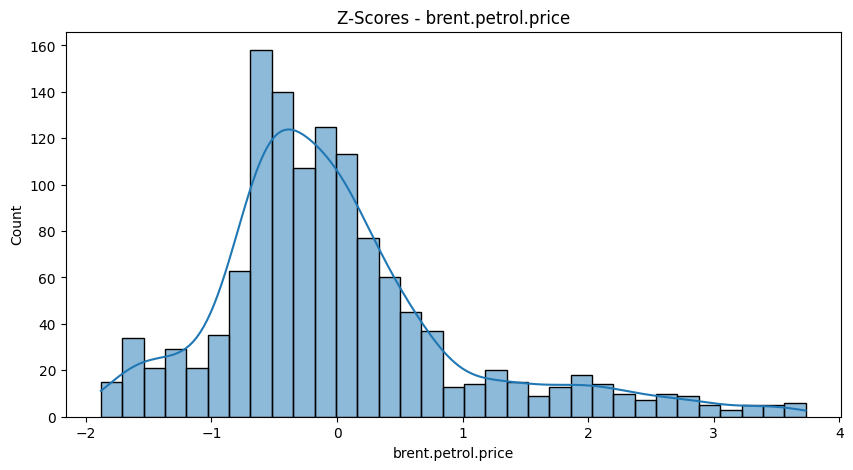

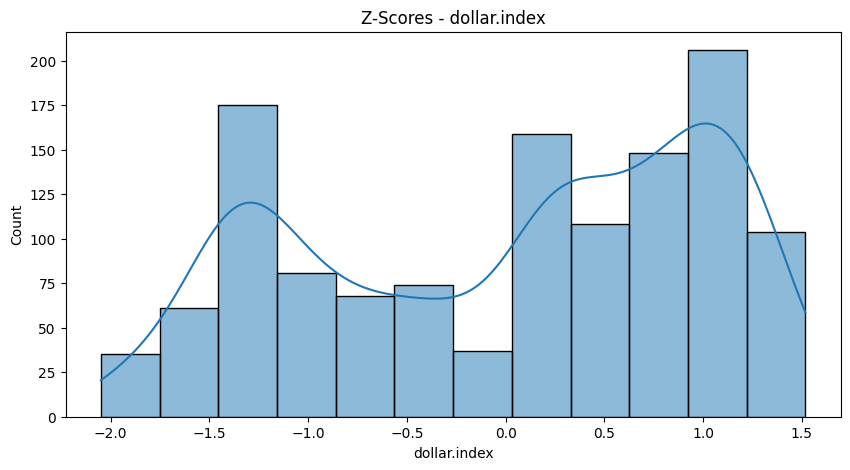

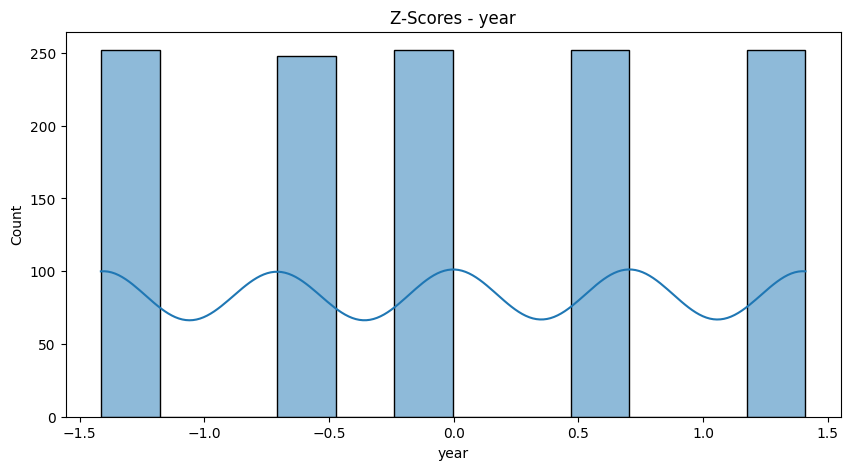

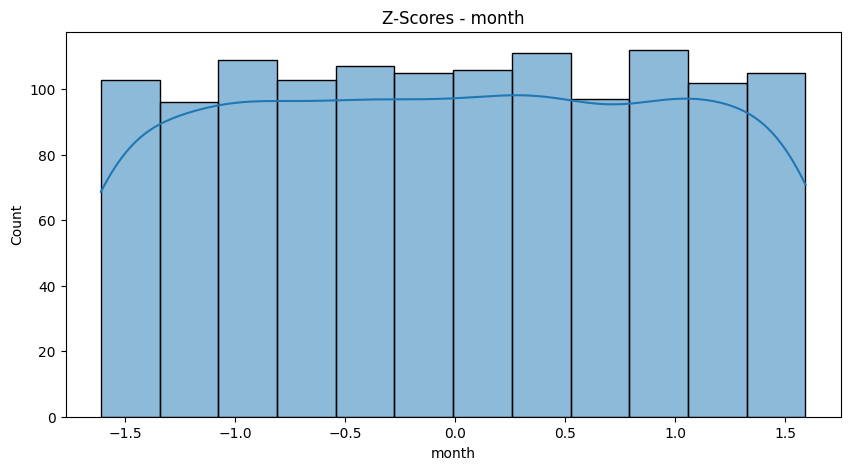

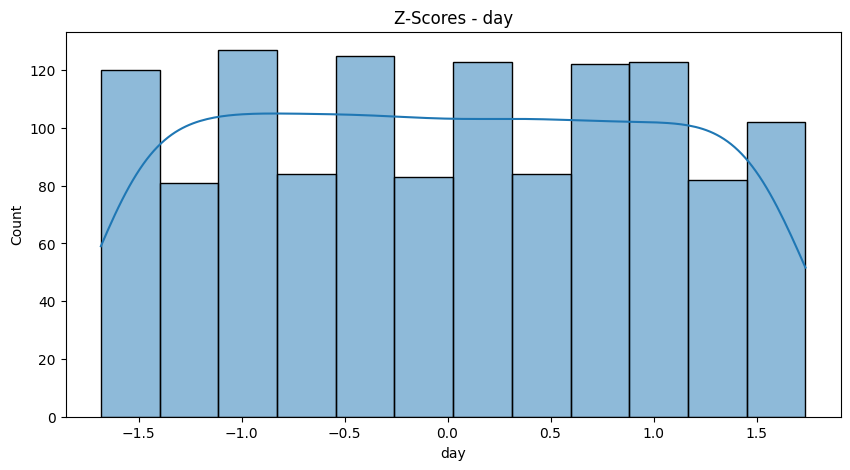

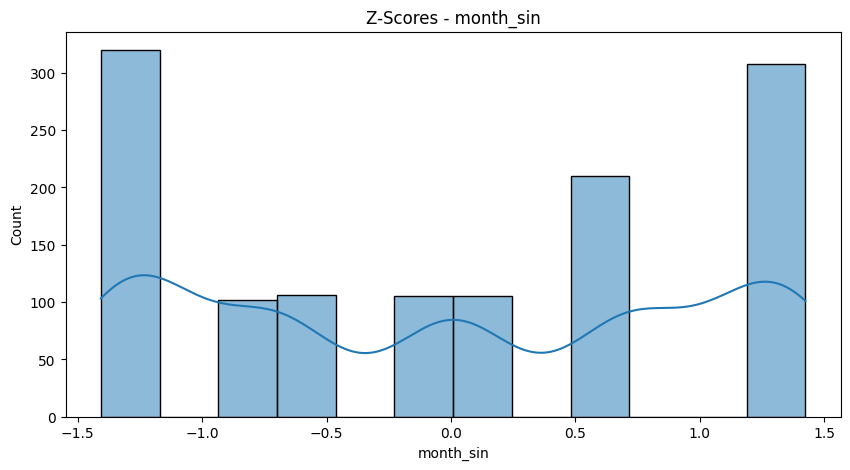

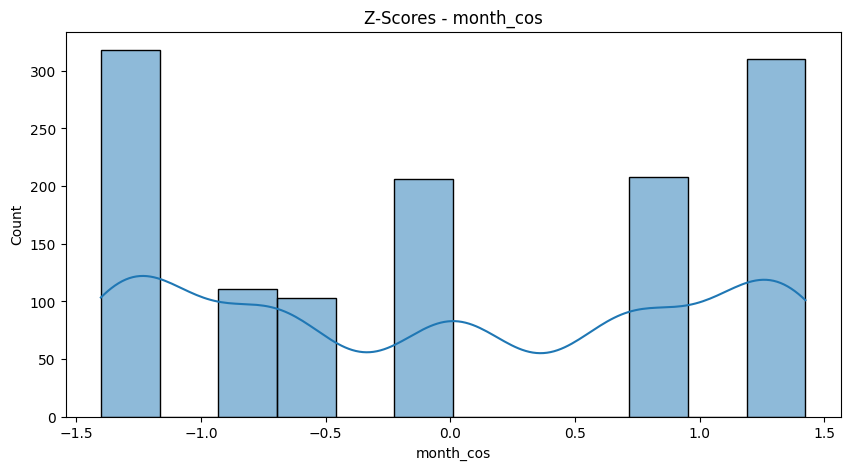

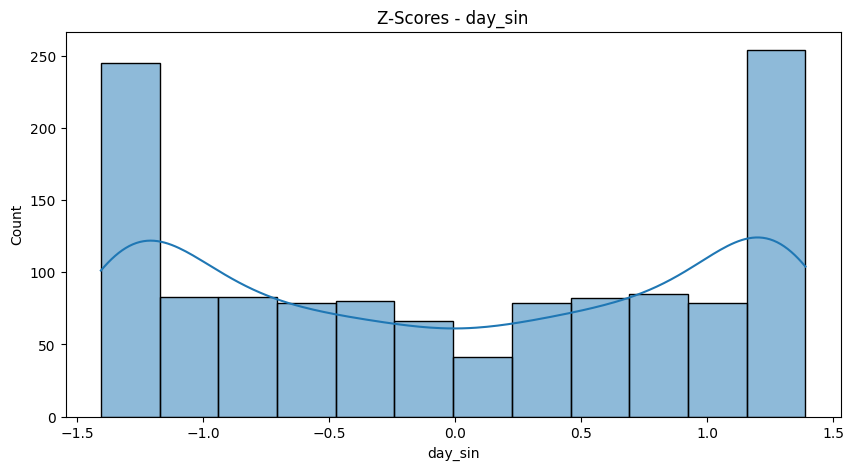

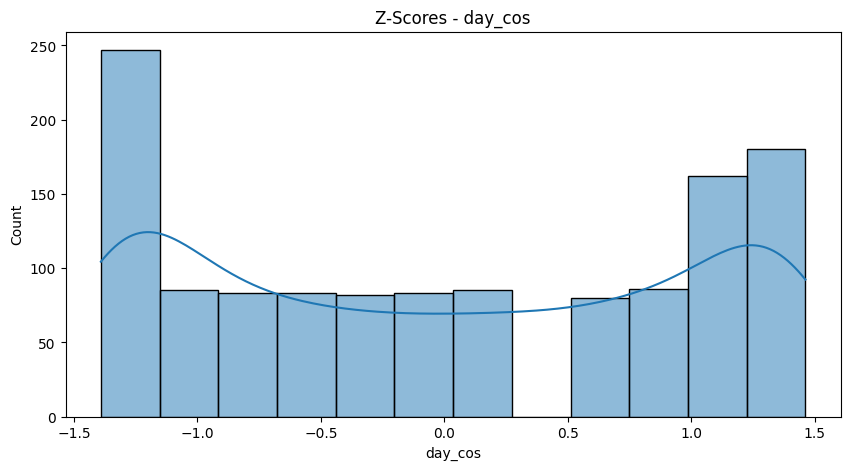

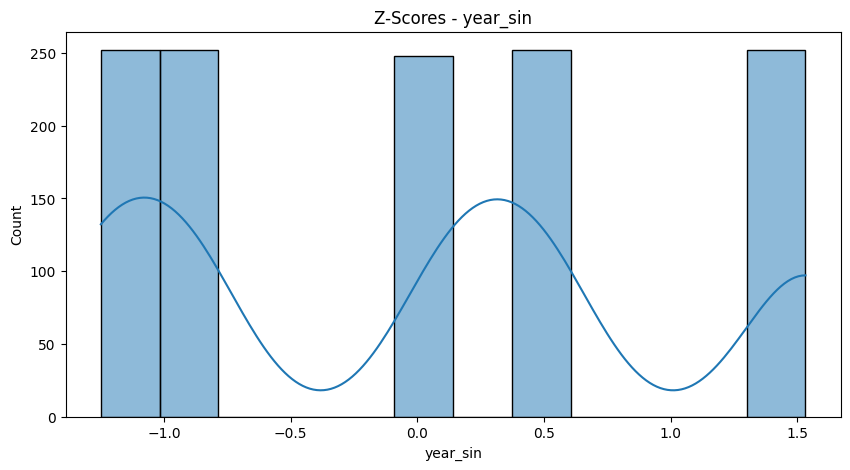

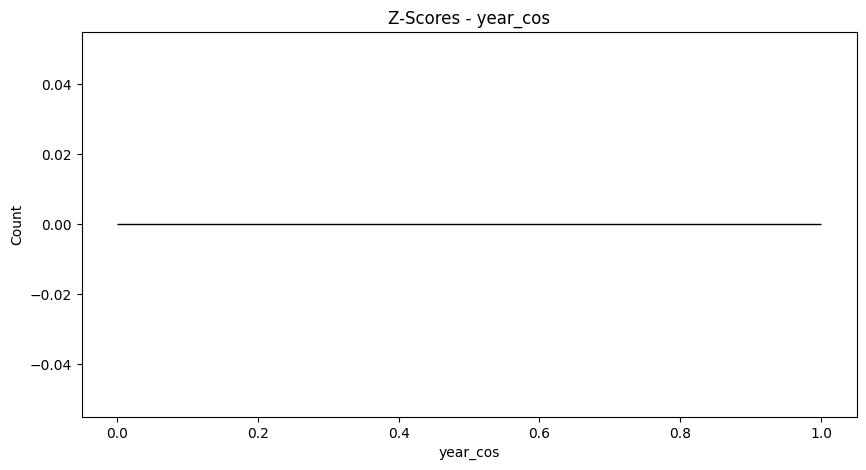

In [511]:
for column_name, i in z_scores.items():
    plt.figure(figsize=(10, 5)) 
    sns.histplot(data=i, kde=True) 
    plt.title(f"Z-Scores - {column_name}")
    plt.show()

Extreme values in the WMT_vol. feature stand out prominently, with Z-scores exceeding +3. This indicates occasional unexpected and large fluctuations in trading volume. However, Z-scores for other features generally remain within the ±3 range. This suggests that our data is largely unaffected by outliers and that our analyses reflect general trends. Nevertheless, the outliers in the WMT_vol. feature should be taken into account and their potential impact analyzed

In [512]:
df

,Date,WMT_price,WMT_vol.,nyse.price,silver.price,gold.price,brent.petrol.price,dollar.index,year,month,day,month_sin,month_cos,day_sin,day_cos,year_sin,year_cos
0,2004-12-31,17.61,25.18,7.250,6.80,438.45,40.46,80.85,2004,12,31,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-4.624167e-13,1.0
1,2004-12-30,17.69,19.62,7.253,6.80,437.45,40.37,80.53,2004,12,30,-2.449294e-16,1.000000,-2.012985e-01,0.979530,-4.624167e-13,1.0
2,2004-12-29,17.81,17.25,7.242,6.81,436.38,39.17,80.97,2004,12,29,-2.449294e-16,1.000000,-3.943559e-01,0.918958,-4.624167e-13,1.0
3,2004-12-28,17.74,19.85,7.245,7.00,443.50,40.07,80.72,2004,12,28,-2.449294e-16,1.000000,-5.712682e-01,0.820763,-4.624167e-13,1.0
4,2004-12-27,17.60,29.00,7.197,6.97,444.73,40.71,80.72,2004,12,27,-2.449294e-16,1.000000,-7.247928e-01,0.688967,-4.624167e-13,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,2000-01-07,22.83,23.93,6.792,5.06,289.00,26.10,103.68,2000,1,7,5.000000e-01,0.866025,9.884683e-01,0.151428,-1.285667e-12,1.0
1252,2000-01-06,21.23,19.64,6.635,5.10,291.25,25.84,104.22,2000,1,6,5.000000e-01,0.866025,9.377521e-01,0.347305,-1.285667e-12,1.0
1253,2000-01-05,21.00,21.06,6.567,5.09,288.60,26.05,104.64,2000,1,5,5.000000e-01,0.866025,8.486443e-01,0.528964,-1.285667e-12,1.0
1254,2000-01-04,21.44,20.24,6.543,5.08,292.10,25.65,104.29,2000,1,4,5.000000e-01,0.866025,7.247928e-01,0.688967,-1.285667e-12,1.0


In [513]:
df["daily_returns"]=df["WMT_price"].pct_change()
window_size=30 
df["rolling_volatility"]=df["daily_returns"].rolling(window=window_size).std()



In [514]:
df

,Date,WMT_price,WMT_vol.,nyse.price,silver.price,gold.price,brent.petrol.price,dollar.index,year,month,day,month_sin,month_cos,day_sin,day_cos,year_sin,year_cos,daily_returns,rolling_volatility
0,2004-12-31,17.61,25.18,7.250,6.80,438.45,40.46,80.85,2004,12,31,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-4.624167e-13,1.0,NaN,NaN
1,2004-12-30,17.69,19.62,7.253,6.80,437.45,40.37,80.53,2004,12,30,-2.449294e-16,1.000000,-2.012985e-01,0.979530,-4.624167e-13,1.0,0.004543,NaN
2,2004-12-29,17.81,17.25,7.242,6.81,436.38,39.17,80.97,2004,12,29,-2.449294e-16,1.000000,-3.943559e-01,0.918958,-4.624167e-13,1.0,0.006783,NaN
3,2004-12-28,17.74,19.85,7.245,7.00,443.50,40.07,80.72,2004,12,28,-2.449294e-16,1.000000,-5.712682e-01,0.820763,-4.624167e-13,1.0,-0.003930,NaN
4,2004-12-27,17.60,29.00,7.197,6.97,444.73,40.71,80.72,2004,12,27,-2.449294e-16,1.000000,-7.247928e-01,0.688967,-4.624167e-13,1.0,-0.007892,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,2000-01-07,22.83,23.93,6.792,5.06,289.00,26.10,103.68,2000,1,7,5.000000e-01,0.866025,9.884683e-01,0.151428,-1.285667e-12,1.0,0.018287,0.037506
1252,2000-01-06,21.23,19.64,6.635,5.10,291.25,25.84,104.22,2000,1,6,5.000000e-01,0.866025,9.377521e-01,0.347305,-1.285667e-12,1.0,-0.070083,0.040295
1253,2000-01-05,21.00,21.06,6.567,5.09,288.60,26.05,104.64,2000,1,5,5.000000e-01,0.866025,8.486443e-01,0.528964,-1.285667e-12,1.0,-0.010834,0.040478
1254,2000-01-04,21.44,20.24,6.543,5.08,292.10,25.65,104.29,2000,1,4,5.000000e-01,0.866025,7.247928e-01,0.688967,-1.285667e-12,1.0,0.020952,0.037569


In [515]:
df["lag_1"]=df["WMT_price"].shift(1)
df["lag_2"]=df["WMT_price"].shift(2)
df["log_volatility"]=np.log(df["rolling_volatility"]+1)

df["rolling_mean_30"]=df["WMT_price"].rolling(window=30).mean()
df["rolling_mean_60"]=df["WMT_price"].rolling(window=60).mean()
df["lag_3"]=df["WMT_price"].shift(3)
df["lag_5"]=df["WMT_price"].shift(5)


In [516]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
X=df[["lag_1","lag_2","rolling_volatility","WMT_vol.","month_sin","month_cos", 
        "day_sin","day_cos","year_sin","year_cos","nyse.price", 
        "silver.price","gold.price","brent.petrol.price","dollar.index","log_volatility","rolling_mean_30",
        "rolling_mean_60","lag_3","lag_5"]]
y=df["WMT_price"]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,shuffle=False)
model=XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,subsample=.8,colsample_bytree=1)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)




In [517]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae=mean_absolute_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,squared=False)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MAE: 0.532416460249159
RMSE: 0.6703650022684071


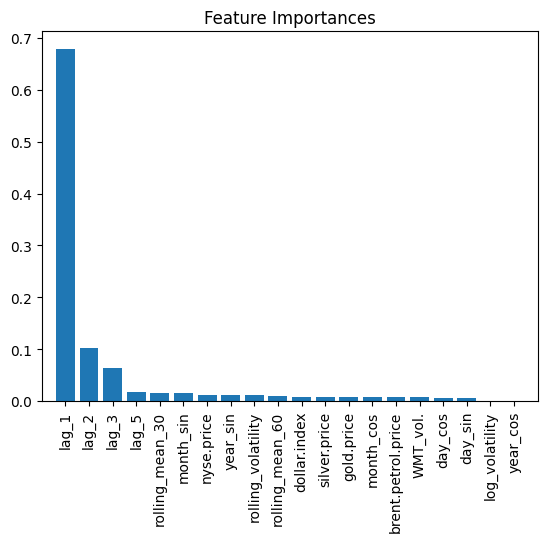

In [518]:
import matplotlib.pyplot as plt
importances=model.feature_importances_
indices=np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]),importances[indices],align="center")
plt.xticks(range(X.shape[1]),np.array(X.columns)[indices],rotation=90)
plt.xlim([-1,X.shape[1]])
plt.show()


In [519]:
from xgboost import XGBRegressor

model=XGBRegressor()
model.fit(X_train, y_train)
importance=model.feature_importances_


In [520]:
importance

array([0.8250891 , 0.01007691, 0.01806426, 0.00890735, 0.01237875,
       0.00495451, 0.00656019, 0.00596504, 0.01532818, 0.        ,
       0.01660251, 0.01156917, 0.01124404, 0.00802943, 0.00635363,
       0.        , 0.01069453, 0.00717638, 0.01152682, 0.00947935],
      dtype=float32)

In [521]:

df=df.drop(columns=["log_volatility","year_cos","year_sin","Date"])  


In [522]:
volatility=df["WMT_price"].describe()
volatility=volatility["std"]

In [523]:
from xgboost import XGBRegressor
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)
model_xgrb=XGBRegressor()
model_xgrb.fit(X_train, y_train)
importance=model.feature_importances_
importance

array([0.8250891 , 0.01007691, 0.01806426, 0.00890735, 0.01237875,
       0.00495451, 0.00656019, 0.00596504, 0.01532818, 0.        ,
       0.01660251, 0.01156917, 0.01124404, 0.00802943, 0.00635363,
       0.        , 0.01069453, 0.00717638, 0.01152682, 0.00947935],
      dtype=float32)

In [524]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

model3 =XGBRegressor(n_estimators=700,learning_rate=0.05,max_depth=3,subsample=1,colsample_bytree=0.8)
model3.fit(X_train,y_train)

y_pred3=model3.predict(X_test)


In [525]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae=mean_absolute_error(y_test,y_pred3)
rmse=np.sqrt(mean_squared_error(y_test,y_pred3))
mape=np.mean(np.abs((y_test-y_pred3)/y_test)) * 100
print(f'MAPE: {mape:.2f}%')
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MAPE: 3.57%
MAE: 0.6395917078048463
RMSE: 0.7897606611913771


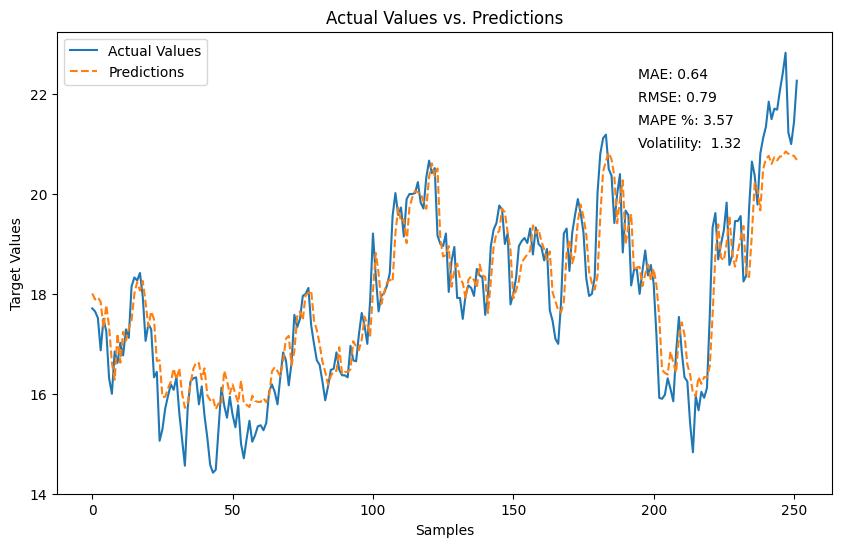

In [526]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values,label="Actual Values")
plt.plot(y_pred,label="Predictions",linestyle='--')
plt.legend()
plt.xlabel("Samples")
plt.ylabel("Target Values")
plt.title("Actual Values vs. Predictions")
plt.text(0.75, 0.9 , f"MAE: {mae:.2f}", transform=plt.gca().transAxes)
plt.text(0.75, 0.85 , f"RMSE: {rmse:.2f}", transform=plt.gca().transAxes)
plt.text(0.75, 0.80 , f"MAPE %: {mape:.2f}", transform=plt.gca().transAxes)
plt.text(0.75,0.75 , f"Volatility: {volatility : .2f}" ,transform=plt.gca().transAxes)
plt.show()


In [527]:
X_train

,lag_1,lag_2,rolling_volatility,WMT_vol.,month_sin,month_cos,day_sin,day_cos,year_sin,year_cos,nyse.price,silver.price,gold.price,brent.petrol.price,dollar.index,log_volatility,rolling_mean_30,rolling_mean_60,lag_3,lag_5
0,NaN,NaN,NaN,25.18,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-4.624167e-13,1.0,7.250,6.80,438.45,40.46,80.85,NaN,NaN,NaN,NaN,NaN
1,17.61,NaN,NaN,19.62,-2.449294e-16,1.000000,-2.012985e-01,0.979530,-4.624167e-13,1.0,7.253,6.80,437.45,40.37,80.53,NaN,NaN,NaN,NaN,NaN
2,17.69,17.61,NaN,17.25,-2.449294e-16,1.000000,-3.943559e-01,0.918958,-4.624167e-13,1.0,7.242,6.81,436.38,39.17,80.97,NaN,NaN,NaN,NaN,NaN
3,17.81,17.69,NaN,19.85,-2.449294e-16,1.000000,-5.712682e-01,0.820763,-4.624167e-13,1.0,7.245,7.00,443.50,40.07,80.72,NaN,NaN,NaN,17.61,NaN
4,17.74,17.81,NaN,29.00,-2.449294e-16,1.000000,-7.247928e-01,0.688967,-4.624167e-13,1.0,7.197,6.97,444.73,40.71,80.72,NaN,NaN,NaN,17.69,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,17.58,17.23,0.028160,25.33,5.000000e-01,0.866025,9.987165e-01,-0.050649,-6.251068e-13,1.0,6.759,4.48,267.25,25.62,110.32,0.027770,17.785667,17.105500,17.31,18.23
1000,17.98,17.58,0.025733,29.43,5.000000e-01,0.866025,8.486443e-01,0.528964,-6.251068e-13,1.0,6.774,4.43,268.25,24.79,109.66,0.025407,17.791667,17.131833,17.23,17.65
1001,17.98,17.98,0.026490,41.45,5.000000e-01,0.866025,7.247928e-01,0.688967,-6.251068e-13,1.0,6.894,4.45,266.85,26.20,110.52,0.026145,17.834333,17.162667,17.58,17.31
1002,18.73,17.98,0.027278,59.87,5.000000e-01,0.866025,5.712682e-01,0.820763,-6.251068e-13,1.0,6.968,4.44,261.50,26.18,110.98,0.026913,17.906000,17.206833,17.98,17.23


In [528]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

model_catB=CatBoostRegressor(iterations=800,learning_rate=0.02,depth=3, verbose=0)

model_catB.fit(X_train, y_train)

y_pred=model_catB.predict(X_test)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mape=np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MAPE: {mape:.2f}%')
print(f"Mean Squared Error (MSE): {mse}")
print(f"RMSE: {rmse}")


MAPE: 3.53%
Mean Squared Error (MSE): 0.6087738290554469
RMSE: 0.780239597210656


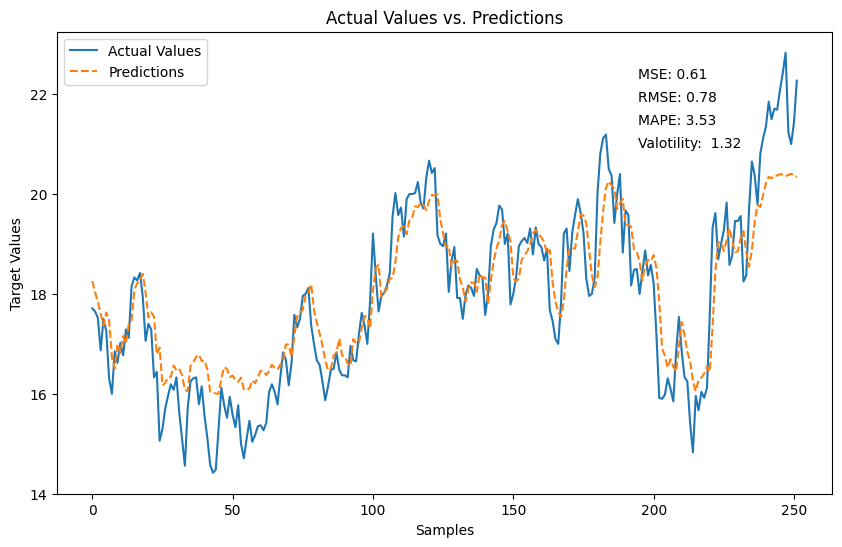

In [529]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(y_test.values,label="Actual Values")
plt.plot(y_pred,label="Predictions",linestyle='--')
plt.legend()
plt.xlabel("Samples")
plt.ylabel("Target Values")
plt.title("Actual Values vs. Predictions")
plt.text(0.75, 0.9 , f"MSE: {mse:.2f}", transform=plt.gca().transAxes)
plt.text(0.75, 0.85 , f"RMSE: {rmse:.2f}", transform=plt.gca().transAxes)
plt.text(0.75, 0.80 , f"MAPE: {mape:.2f}", transform=plt.gca().transAxes)
plt.text(0.75,0.75 , f"Valotility: {volatility : .2f}" ,transform=plt.gca().transAxes)
plt.show()


In [530]:
def calculate_mape(y_true,y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [532]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

X=df.drop("WMT_price",axis=1) 

y=df["WMT_price"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

train_data=lgb.Dataset(X_train,label=y_train)
test_data=lgb.Dataset(X_test,label=y_test)


params = {
    "objective": "regression",
    "metric": "rmse",  
    "learning_rate": 0.2,
    "num_leaves":100,  
    "verbose": -1
}


model_lgb=lgb.train(params,train_data,num_boost_round=75,valid_sets=[test_data],valid_names=['valid'])

y_pred=model_lgb.predict(X_test,num_iteration=model_lgb.best_iteration)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
n=len(y_test)  
p=X_test.shape[1] 
adjusted_r2=1 - (1 - r2) * (n - 1) / (n - p - 1)
mape=calculate_mape(y_test, y_pred)
explained_variance=explained_variance_score(y_test,y_pred)


print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R²: {r2:.4f}')
print(f'Adjusted R²: {adjusted_r2:.4f}')
print(f'Explained Variance Score: {explained_variance:.4f}')
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")


Mean Squared Error (MSE): 0.1366
Root Mean Squared Error (RMSE): 0.3695
Mean Absolute Error (MAE): 0.2065
R²: 0.9585
Adjusted R²: 0.9547
Explained Variance Score: 0.9589
Mean Absolute Percentage Error (MAPE): 1.1226%


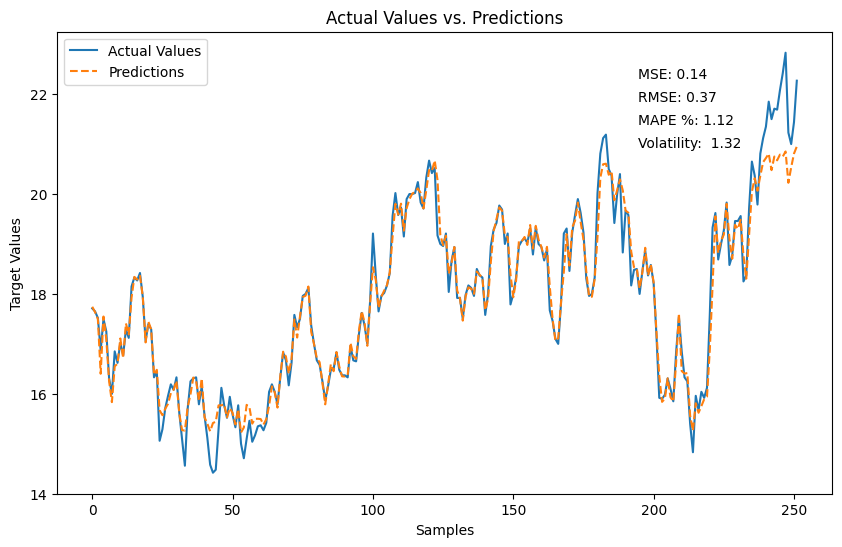

In [533]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(y_test.values,label="Actual Values")
plt.plot(y_pred,label="Predictions",linestyle='--')
plt.legend()
plt.xlabel("Samples")
plt.ylabel("Target Values")
plt.title("Actual Values vs. Predictions")
plt.text(0.75, 0.9 , f"MSE: {mse:.2f}", transform=plt.gca().transAxes)
plt.text(0.75, 0.85 , f"RMSE: {rmse:.2f}", transform=plt.gca().transAxes)
plt.text(0.75, 0.80 , f"MAPE %: {mape:.2f}", transform=plt.gca().transAxes)
plt.text(0.75,0.75 , f"Volatility: {volatility : .2f}" ,transform=plt.gca().transAxes)
plt.show()


In [534]:
from sklearn.ensemble import HistGradientBoostingRegressor
model_hist=HistGradientBoostingRegressor(learning_rate=0.1,
    max_iter=7700,
    max_leaf_nodes=5,
    max_depth=7,
    min_samples_leaf=5,
    l2_regularization=2,
    early_stopping=True
)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,shuffle=False)
model_hist.fit(X_train,y_train)
y_pred=model_hist.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test,y_pred)

r2=r2_score(y_test,y_pred)
n=len(y_test)  
p=X_test.shape[1]  
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mape=calculate_mape(y_test,y_pred)

explained_variance=explained_variance_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R²: {r2:.4f}')
print(f'Adjusted R²: {adjusted_r2:.4f}')
print(f'Explained Variance Score: {explained_variance:.4f}')
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

Mean Squared Error (MSE): 0.0710
Root Mean Squared Error (RMSE): 0.2664
Mean Absolute Error (MAE): 0.1435
R²: 0.9784
Adjusted R²: 0.9764
Explained Variance Score: 0.9786
Mean Absolute Percentage Error (MAPE): 0.7746%


<Figure size 1000x600 with 0 Axes>

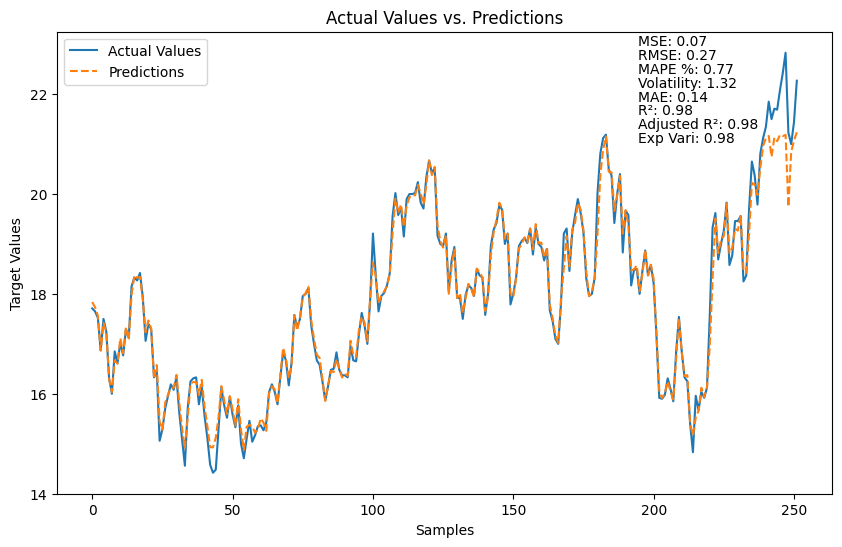

In [535]:
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
plt.plot(y_test.values,label="Actual Values")
plt.plot(y_pred,label="Predictions",linestyle='--')
plt.legend()
plt.xlabel("Samples")
plt.ylabel("Target Values")
plt.title("Actual Values vs. Predictions")
plt.text(0.75,0.97, f"MSE: {mse:.2f}", transform=plt.gca().transAxes)
plt.text(0.75,0.94, f"RMSE: {rmse:.2f}", transform=plt.gca().transAxes)
plt.text(0.75,0.91, f"MAPE %: {mape:.2f}", transform=plt.gca().transAxes)
plt.text(0.75,0.88, f"Volatility: {volatility:.2f}", transform=plt.gca().transAxes)
plt.text(0.75,0.85, f"MAE: {mae:.2f}", transform=plt.gca().transAxes)  
plt.text(0.75,0.82, f"R²: {r2:.2f}", transform=plt.gca().transAxes)      
plt.text(0.75,0.79, f"Adjusted R²: {adjusted_r2:.2f}", transform=plt.gca().transAxes)  
plt.text(0.75,0.76, f"Exp Vari: {explained_variance:.2f}", transform=plt.gca().transAxes)  
plt.show()


In [536]:
q = 0.5
def quantile_loss(y_true, y_pred, quantile):
    errors = y_true - y_pred
    return np.where(errors >= 0, quantile * errors, (quantile - 1) * errors)
loss = quantile_loss(y_test, y_pred, q)
total_loss = np.mean(loss)
print(f"Quantile loss for q={q}: {total_loss}")

Quantile loss for q=0.5: 0.07174508693737186


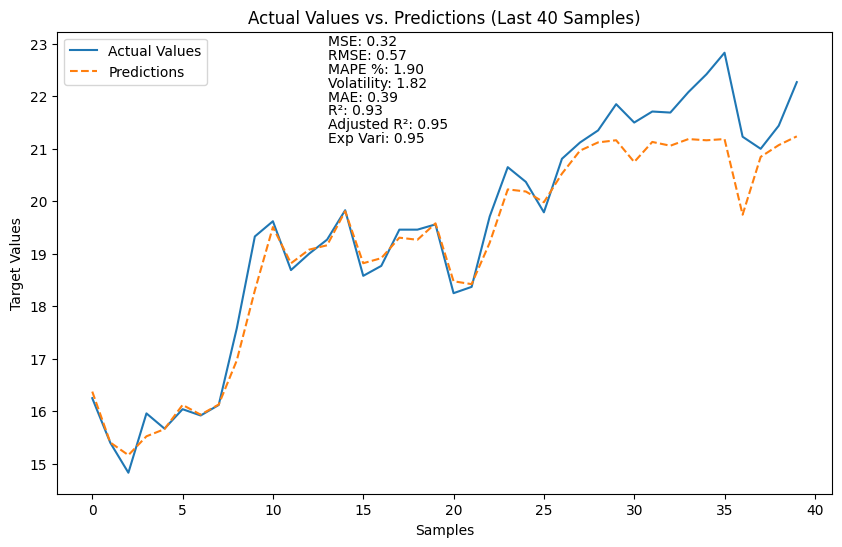

In [541]:
plt.figure(figsize=(10,6))
y_test1=y_test[-40:]
y_pred1=y_pred[-40:]
volatility1=y_test.describe()
volatility1=volatility1["std"]
mse1=mean_squared_error(y_test1,y_pred1)
rmse1=np.sqrt(mse1)
mae1=mean_absolute_error(y_test1,y_pred1)

r2_1=r2_score(y_test1, y_pred1)
n1=len(y_test1)  
p1=X_test.shape[1]  
adjusted_r2_1=1 - (1 - r2) * (n1 - 1) / (n1 - p1 - 1)
mape1=calculate_mape(y_test1, y_pred1)

explained_variance_1 = explained_variance_score(y_test1, y_pred1)
plt.text(0.35,0.97, f"MSE: {mse1:.2f}", transform=plt.gca().transAxes)
plt.text(0.35,0.94, f"RMSE: {rmse1:.2f}", transform=plt.gca().transAxes)
plt.text(0.35,0.91, f"MAPE %: {mape1:.2f}", transform=plt.gca().transAxes)
plt.text(0.35,0.88, f"Volatility: {volatility1:.2f}", transform=plt.gca().transAxes)
plt.text(0.35,0.85, f"MAE: {mae1:.2f}", transform=plt.gca().transAxes)  
plt.text(0.35,0.82, f"R²: {r2_1:.2f}", transform=plt.gca().transAxes)      
plt.text(0.35,0.79, f"Adjusted R²: {adjusted_r2_1:.2f}", transform=plt.gca().transAxes)  
plt.text(0.35,0.76, f"Exp Vari: {explained_variance_1:.2f}", transform=plt.gca().transAxes)  
plt.plot(y_test1.values,label="Actual Values")
plt.plot(y_pred1,label="Predictions",linestyle='--')
plt.legend()
plt.xlabel("Samples")
plt.ylabel("Target Values")
plt.title("Actual Values vs. Predictions (Last 40 Samples)")
plt.show()


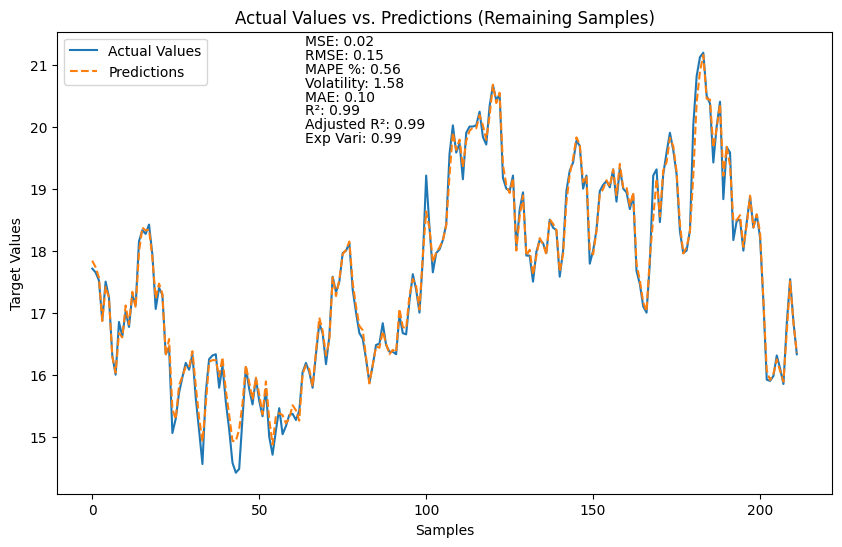

In [544]:
plt.figure(figsize=(10, 6))


y_test2=y_test[:-40]
y_pred2=y_pred[:-40]


volatility2=y_test2.describe()["std"]
mse2=mean_squared_error(y_test2, y_pred2)
rmse2=np.sqrt(mse2)
mae2=mean_absolute_error(y_test2, y_pred2)

r2_2=r2_score(y_test2, y_pred2)
n2=len(y_test2)  
p2=X_test.shape[1]  
adjusted_r2_2=1 - (1 - r2_2) * (n2 - 1) / (n2 - p2 - 1)
mape2=calculate_mape(y_test2, y_pred2)

explained_variance_2=explained_variance_score(y_test2, y_pred2)


plt.text(0.32,0.97,f"MSE: {mse2:.2f}", transform=plt.gca().transAxes)
plt.text(0.32,0.94,f"RMSE: {rmse2:.2f}", transform=plt.gca().transAxes)
plt.text(0.32,0.91,f"MAPE %: {mape2:.2f}", transform=plt.gca().transAxes)
plt.text(0.32,0.88,f"Volatility: {volatility2:.2f}", transform=plt.gca().transAxes)
plt.text(0.32,0.85,f"MAE: {mae2:.2f}", transform=plt.gca().transAxes)  
plt.text(0.32,0.82,f"R²: {r2_2:.2f}", transform=plt.gca().transAxes)      
plt.text(0.32,0.79,f"Adjusted R²: {adjusted_r2_2:.2f}", transform=plt.gca().transAxes)  
plt.text(0.32,.76,f"Exp Vari: {explained_variance_2:.2f}", transform=plt.gca().transAxes)  


plt.plot(y_test2.values,label="Actual Values")
plt.plot(y_pred2,label="Predictions",linestyle='--')
plt.legend()
plt.xlabel("Samples")
plt.ylabel("Target Values")
plt.title("Actual Values vs. Predictions (Remaining Samples)")
plt.show()



In [545]:
import pandas as pd

metrics={
    "MSE":[mse],
    "RMSE":[rmse],
    "MAE":[mae],
    "R²":[r2],
    "Explained Variance": [explained_variance],
    "Volatility": [volatility]
}
metrics1={
    "MSE":[mse1],
    "RMSE":[rmse1],
    "MAE":[mae1],
    "R²":[r2_1],
    "Explained Variance":[explained_variance_1],
    "Volatility":[volatility1]
}
metrics2={
    "MSE":[mse2],
    "RMSE":[rmse2],
    "MAE":[mae2],
    "R²":[r2_2],
    "Explained Variance":[explained_variance_2],
    "Volatility":[volatility2]
}

df_metrics=pd.DataFrame(metrics,index=["Full Dataset Metrics"])
df_metrics1=pd.DataFrame(metrics1,index=["Last 40 Metrics"])
df_metrics2=pd.DataFrame(metrics2,index=["Remaining Metrics"])


metrics=pd.concat([df_metrics, df_metrics1, df_metrics2])




In [546]:
metrics

,MSE,RMSE,MAE,R²,Explained Variance,Volatility
Full Dataset Metrics,0.070994,0.266448,0.143490,0.978399,0.978649,1.324039
Last 40 Metrics,0.323651,0.568904,0.389668,0.933025,0.952502,1.816518
Remaining Metrics,0.023323,0.152719,0.097042,0.990664,0.990891,1.584301


The model's performance has significantly declined when predicting the latter portions of the dataset. This decline is evident in the evaluation metrics, which indicate a discrepancy between actual values and predictions in the most recent periods. Furthermore, this trend is also reflected in the graphs, illustrating the gap between predicted and actual values in the last sections of the data.